## Support Vector Machines
- SVM is a powerful classifier that works both on linearly and non-linearly separable data


<img src="img/linearly_separable.PNG" alt="Linear Separable" style="width: 500px;"/>



- Finds an optimal hyperplane, that best separates our data so that the distance from nearest points in space to itself(also called margin) is maximized
- These nearest points are called **Support Vectors**



<figure>
<img src="img/svm_margin.png" alt="Pizza-1" style="width: 300px;"/>






## Hyperplane

<img src="img/hyperplanes.jpg" alt="Hyperplanes" style="width: 250px;"/>

A hyperplane is plane of _n-1_ dimensions in _n_ dimensional feature space, that separates the two classes. 
For a 2-D feature space, it would be a line and for a 3-D Feature space it would be plane and so on.

<img src="img/3d_hyperplane.png" alt="Hyperplanes" style="width: 200px;"/>



A hyperplane is able to separate classes if for all points -

#### **_w_ x** + b > 0 
(For data points in class 1)  
#### **_w_ x** + b < 0 
(For data points in  class 0)

## Maximum Margin Hyperplane 

An optimal hyperplane best separates our data so that the distance/margin from nearest points(called Support Vectors) in space to itself is maximized.

<img src="img/maximum_margin.png" alt="Hyperplanes" style="width: 400px;"/>


### SVM Implementation using Pegasos

**Formulating SVM as Unconstrainted Optimization Problem**

Pegasos: Primal Estimated sub-GrAdient SOlver for SVM

The final SVM Objective we derived was -

<img src="img/loss.png" alt="Hinge Loss" style="width: 400px;"/>






### Generate Dataset

In [27]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
plt.style.use('seaborn')

In [28]:
X,Y = make_classification(n_classes=2,n_clusters_per_class=1,random_state=3,n_samples=400,n_features=2,n_informative=2,n_redundant=0)

In [29]:
# change labels to {-1,1} from {0,1}
Y[Y==0] = -1 # Broadcasting
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

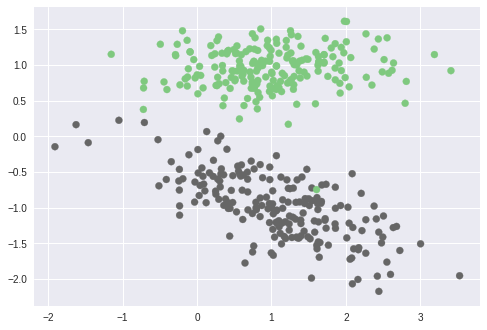

In [30]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [31]:
class SVM:
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
    
    def hingeLoss(self,W,b,X,Y):
        loss = 0.0
        loss += 0.5*np.dot(W,W.T)
        m = X.shape[0]
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C*max(0,(1-ti))
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,lr=0.001,maxItr=300):
        no_of_samples = X.shape[0]
        no_of_features = X.shape[1]
        c = self.C
        # initialize the parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        losses = []
        for i in range(maxItr): # Training loop
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            # Batch gradient descent with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                gradw = 0
                gradb = 0
                # iterate over examples in mini-batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T)+bias)
                        if ti<1:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                # Update W,bias with the value of gradient from Batch
                W = W - lr*W + lr*gradw
                bias = bias + lr*gradb
        self.W = W
        self.b = bias
        return W,bias,losses

In [32]:
my_SVM = SVM()
W,b,losses = my_SVM.fit(X,Y,maxItr=100)

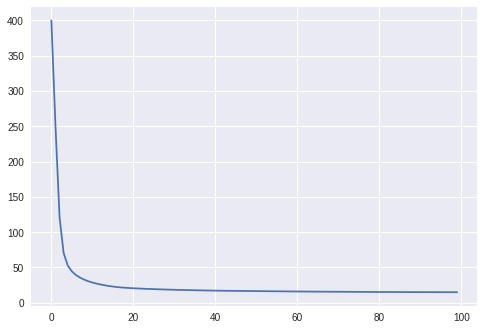

[[-0.32175925 -2.03511528]] 0.3860000000000003


In [33]:
plt.plot(losses)
plt.show()
W,B = my_SVM.W,my_SVM.b
print(W,B)

### Hyperplane

In [34]:
def plotHyperplane(w1,w2,b):
    plt.figure(figsize=(12,12))
    x1 = np.linspace(-2,4,10)
    x2 = -(w1*x1+b)/w2 # WX + B = 0
    xp = -(w1*x1+b+1)/w2 # WX + B = -1
    xn = -(w1*x1+b-1)/w2 # WX + B = +1
    plt.plot(x1,x2,label="Hyperplane WX+B = 0")
    plt.plot(x1,xp,label="+ve Hyperplane WX+B = +1")
    plt.plot(x1,xn,label="-ve Hyperplane WX+B = -1")
    plt.legend()
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
    plt.show()

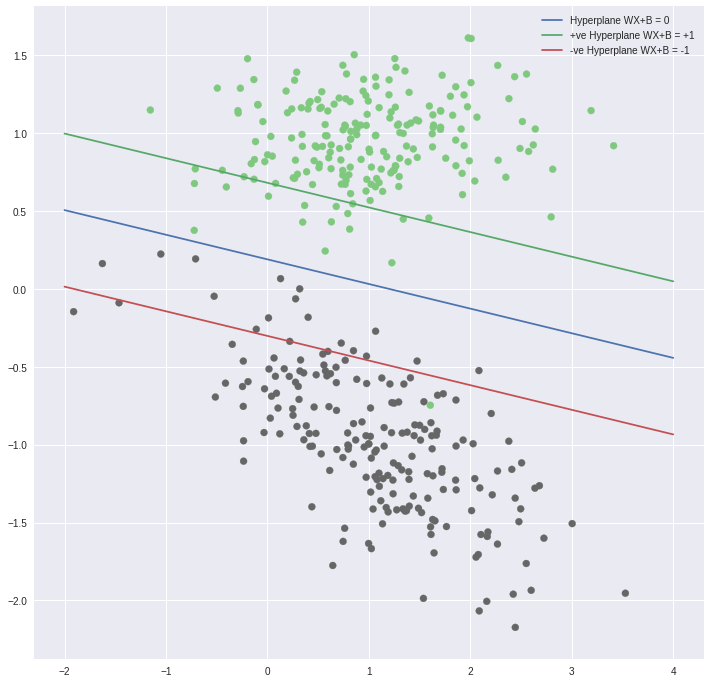

In [35]:
plotHyperplane(W[0,0],W[0,1],B)

### Visualizing Support Vectors, +ve & -ve Hyperplanes

19141.156992035445


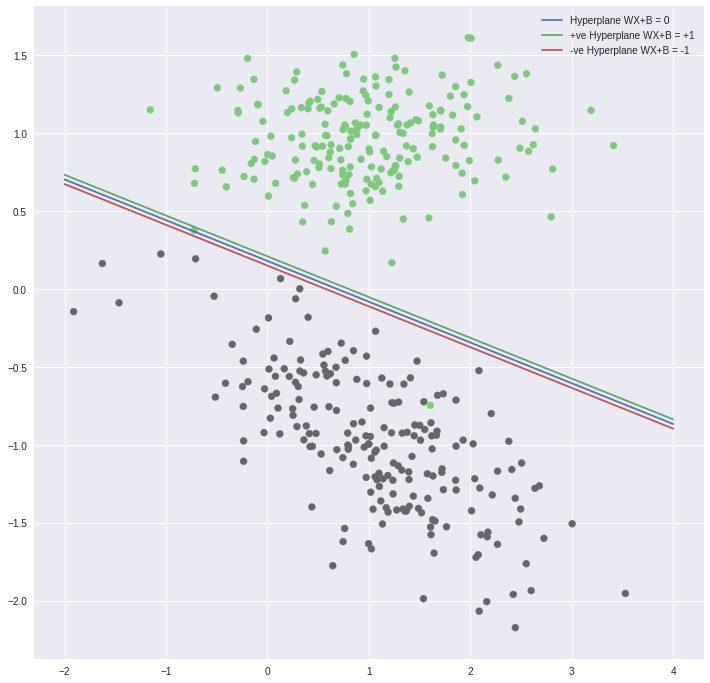

In [36]:
# Changing the penalty constant C
my_SVM = SVM(C=1000)
W,b,losses = my_SVM.fit(X,Y,maxItr=100)
W,B = my_SVM.W,my_SVM.b
print(losses[-1])
plotHyperplane(W[0,0],W[0,1],B)